<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #2: ES models

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

%matplotlib inline

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def qualityMACAPE(x,y):
    # Mean average corrected absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = (2*(x-y).abs()/(x+y)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() 

In [3]:
def my_hash(l, mod=100019, mul=911):
    h = 1
    for x in l:
        h = h*mul + int(x)
        h = h % mod
    return h

<h1 align="center">Info</h1> 

This practice task is desinged for impriving knowledge of ARIMA models and getting aqcuainted with statistical time series analysis in python.

The task should take about 3-5 hours to be completed.

<h1 align="center">1. Reading data (5%)</h1>

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)
     - 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">energy_cunsumption.csv</span> (105 TS of goods sales in shop #36 of one real Retail Net, each TS correspond to an item in shop )
 
 All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ5by4qa_HFqAAoYIg'>link</a> 
 
 
 * For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot each time series
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

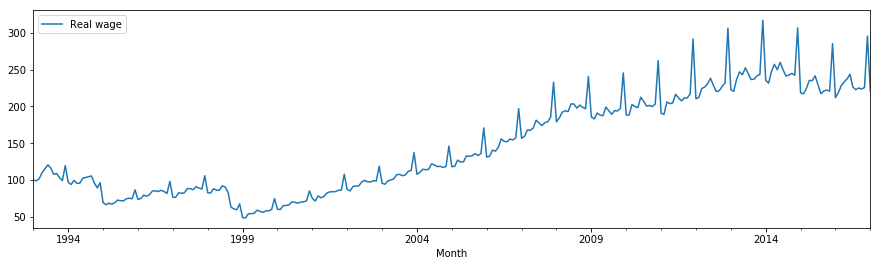

,Real wage
Month,
1993-01-01,100.00
1993-02-01,99.04
1993-03-01,101.77
1993-04-01,110.05
1993-05-01,115.47


In [4]:
ts_wage = pd.read_csv('./data/monthly-wage.csv', sep=';',  decimal='.', index_col='Month', parse_dates=True)
ts_wage.plot(figsize=(15,4))
plt.show()
ts_wage.head()

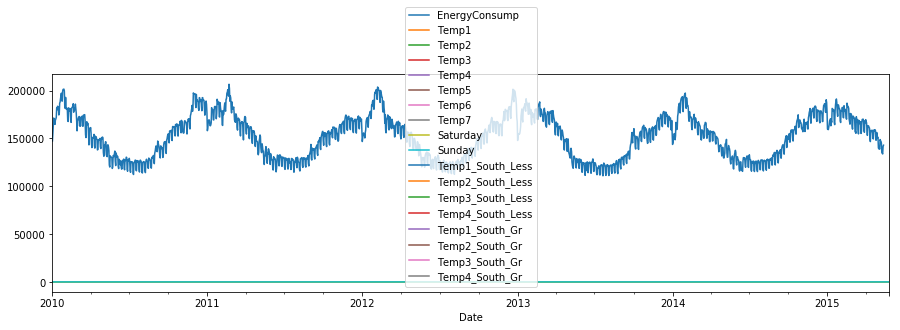

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Date,,,,,,,,,,,,,,,,,,,,
2010-01-01,Center,FZSZOE27,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,Center,FZSZOE27,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,Center,FZSZOE27,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,Center,FZSZOE27,171382.848,-10.2,-15.7,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,Center,FZSZOE27,170188.290,-7.2,-8.8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ts_energy = pd.read_csv('./data/energy_consump.csv', sep=',',  decimal='.', dayfirst=True, index_col='Date', parse_dates=True)
ts_energy.plot(figsize=(15,4))
plt.show()
ts_energy.head()

<h1 align="center">2. ARIMA Momdel for wage dataset (40%) </h1>
You need to analyseTS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span> in accordance with forecasting scheme (see lecture slide Scheme of TS forecasting with ARIMA) and then build forecast.

**I. Select ARIMA parameters your self ** 
Also you can follow the next scheme:
<img src='./ARMA Scheme.png'>


Notes: you need follow to the steps
 * 0) Use data before 01.02.2015 
 * 1) Plot the graph of time series, preprocess data (delete tail, make calendar transformation if needed)
 * 2) Dispersion is stabilized through transformation if needed.
 * 3) If the time series is non-stationary the differentiation degrees is
hosen.
 * 4) ACF/PACF are analyzed in order to understand whether AR(p)/MA(q) and seasonal $AR(P)/MA(Q)$  may be used.
 * 5) Candidate models are trained, their AIC/AIC is compared, choose trhe best model.
 * 6) Unbiasedness, stationarity and non-autocorrelation of the residuals of the obtained model are tested; if the tests fail model modifcations are reviewed.
 * 7) Build forecasts and forecastis interval for period from 01.02.2015 to 01.01.2017
     Calculate loss MACAPE of your Forecast.
     Does the forecast look like appropriate?

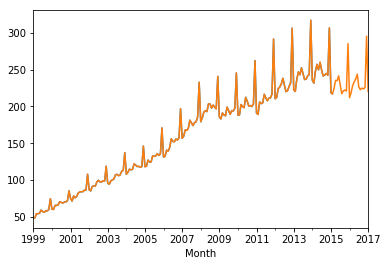

In [6]:
ts_wage['Real wage'].loc['1999':'2015-02-01'].plot()
ts_wage_train = pd.DataFrame(index=ts_wage.loc['1999':].index) #'2015-02-01'
ts_wage_train['real'] = ts_wage['Real wage'].loc['1999':]
ts_wage_train['real'].plot()

In [7]:
ts_wage_train['log'] = np.log(ts_wage_train['real'])

In [8]:
Lambda = -0.4
ts_wage_train['lambda=%0.2f' % Lambda] = (ts_wage_train['real']**Lambda-1)/Lambda

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d29d68a50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3d28098ed0>]], dtype=object)

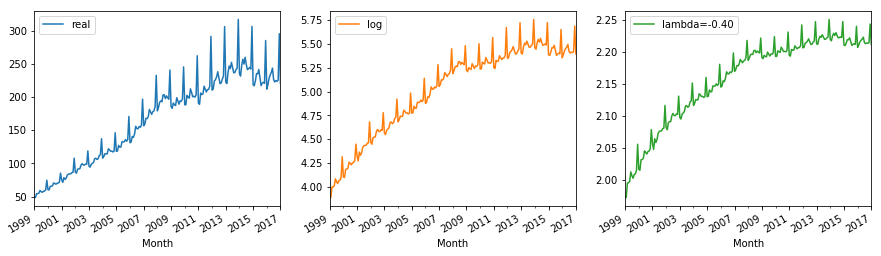

In [9]:
ts_wage_train.plot(subplots=True, layout=(1,-1), figsize=(15,4))

In [10]:
seasonality = 12

ts_wage_train['diff seasonal'] = (ts_wage_train['lambda=-0.40'] - ts_wage_train['lambda=-0.40'].shift(seasonality))
ts_wage_train['diff first seasonal'] = ts_wage_train['diff seasonal'] - ts_wage_train['diff seasonal'].shift(1)
ts_wage_train['diff first-2 seasonal'] = ts_wage_train['diff first seasonal'] - ts_wage_train['diff first seasonal'].shift(1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d23e6dad0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f3d23d69990>], dtype=object)

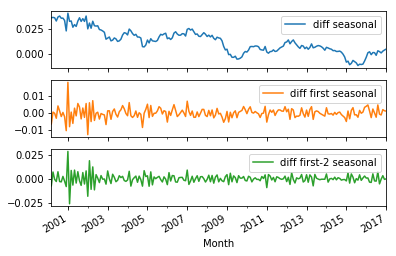

In [11]:
ts_wage_train[['diff seasonal','diff first seasonal','diff first-2 seasonal']].dropna().plot(subplots=True)

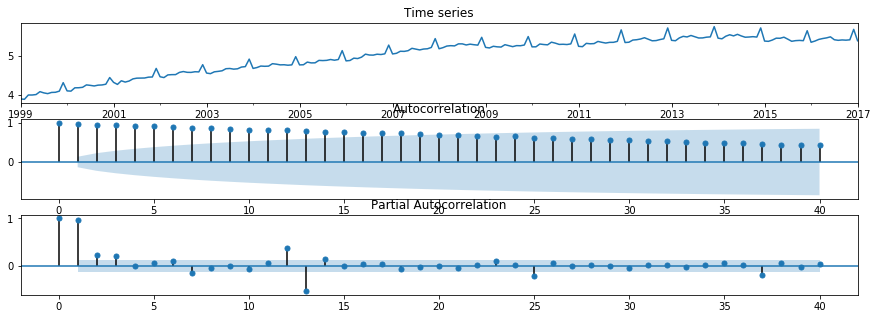

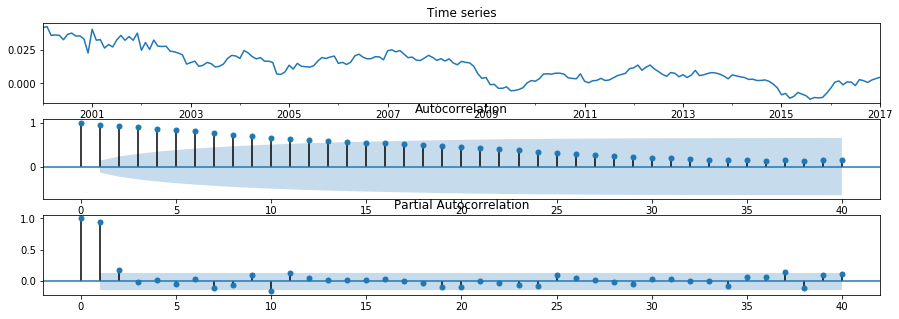

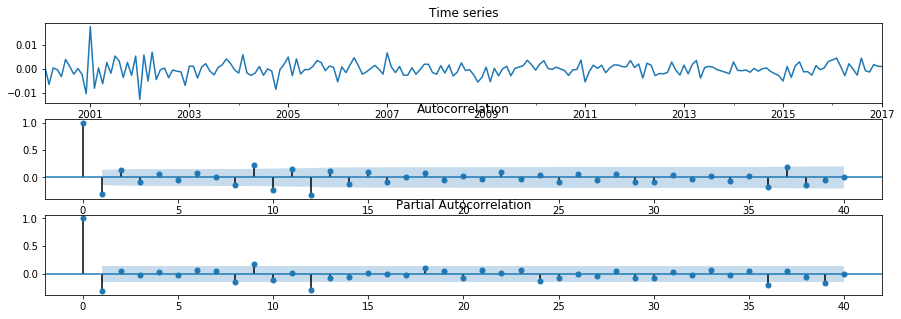

In [12]:
plot_this = ts_wage_train['log'].dropna()
fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(311)
plot_this.plot(ax=ax0, title='Time series')
ax1 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_acf(plot_this, lags=40, ax=ax1)
ax2 = fig.add_subplot(313)
fig = sm.graphics.tsa.plot_pacf(plot_this, lags=40, ax=ax2)
plot_this = ts_wage_train['diff seasonal'].dropna()
fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(311)
plot_this.plot(ax=ax0, title='Time series')
ax1 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_acf(plot_this, lags=40, ax=ax1)
ax2 = fig.add_subplot(313)
fig = sm.graphics.tsa.plot_pacf(plot_this, lags=40, ax=ax2)
plot_this = ts_wage_train['diff first seasonal'].dropna()
fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(311)
plot_this.plot(ax=ax0, title='Time series')
ax1 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_acf(plot_this, lags=40, ax=ax1)
ax2 = fig.add_subplot(313)
fig = sm.graphics.tsa.plot_pacf(plot_this, lags=40, ax=ax2)

### ARMA models

In [13]:
arma_model = sm.tsa.ARMA(ts_wage_train['diff first seasonal'].dropna(),(3, 3)).fit()
print(arma_model.params)
print(arma_model.aic, arma_model.bic, arma_model.hqic)

const                       -0.000183
ar.L1.diff first seasonal    0.888470
ar.L2.diff first seasonal    0.247109
ar.L3.diff first seasonal   -0.578325
ma.L1.diff first seasonal   -1.240031
ma.L2.diff first seasonal    0.153290
ma.L3.diff first seasonal    0.489547
dtype: float64
(-1783.0020075216198, -1756.4570475708661, -1772.2640898210959)


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


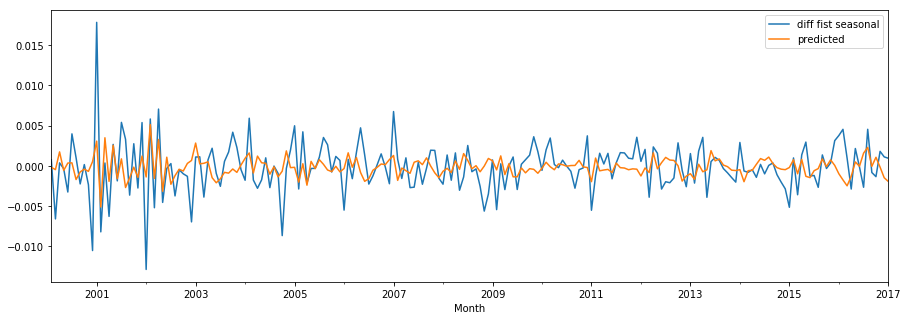

In [14]:
plt.figure(figsize=(15,5))
ts_wage_train['diff first seasonal'].dropna().plot(label='diff fist seasonal')
arma_model.predict().plot(label='predicted')
plt.legend()

#### Watson
indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

In [15]:
sm.stats.durbin_watson(arma_model.resid.values)

2.0140316504528064

In [16]:
print('pvalue: %.2f' % stats.wilcoxon(arma_model.resid.values)[1])

pvalue: 0.97


In [17]:
stats.normaltest(arma_model.resid)

NormaltestResult(statistic=24.373295374699929, pvalue=5.0980742511793671e-06)

So this is stationar, mean is ~zero and is NOT from normal distribution

### ARIMA models

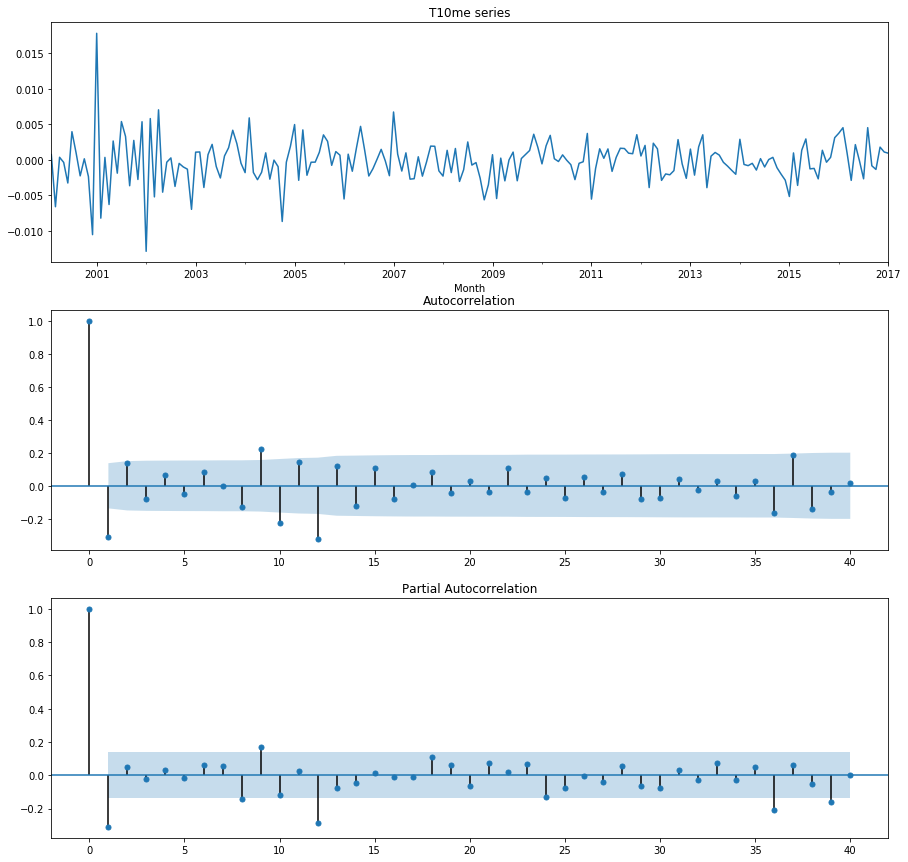

In [18]:
plot_this = ts_wage_train['diff first seasonal'].dropna()
fig = plt.figure(figsize=(15,15))
ax0 = fig.add_subplot(311)
plot_this.plot(ax=ax0, title='T10me series')
ax1 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_acf(plot_this, lags=40, ax=ax1)
ax2 = fig.add_subplot(313)
fig = sm.graphics.tsa.plot_pacf(plot_this, lags=40, ax=ax2)

order:(p,d,q), seasonal_order:(P,D,Q,s)

In [19]:
sarima_model = sm.tsa.SARIMAX(ts_wage_train['lambda=-0.40'], order=(1,1,1),seasonal_order=(1,1,1,12)).fit()
print(sarima_model.params)
print(sarima_model.aic, sarima_model.bic, sarima_model.hqic)

ar.L1      -0.473164
ma.L1       0.182167
ar.S.L12    0.047720
ma.S.L12   -0.344315
sigma2      0.000008
dtype: float64
(-1801.9878088782148, -1785.0883221105125, -1795.1611159309737)


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [20]:
prediction = sarima_model.predict()

In [21]:
Lambda = -0.40
prediction = (prediction * Lambda + 1)**(1/Lambda)

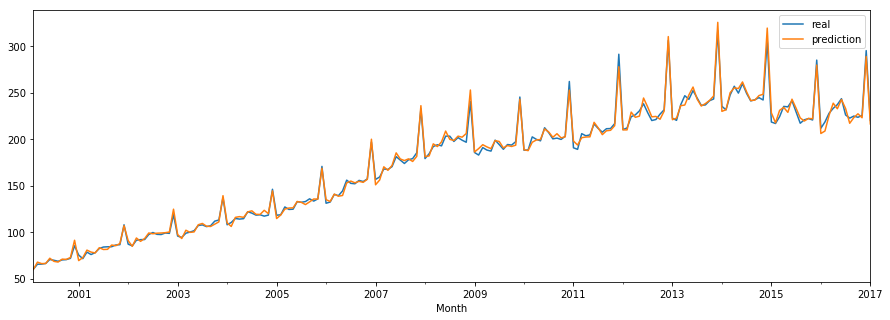

In [22]:
plt.figure(figsize=(15,5))
ts_wage_train['real']['2000-02':].plot(label='real')
prediction['2000-02':].plot(label='prediction')
plt.legend()

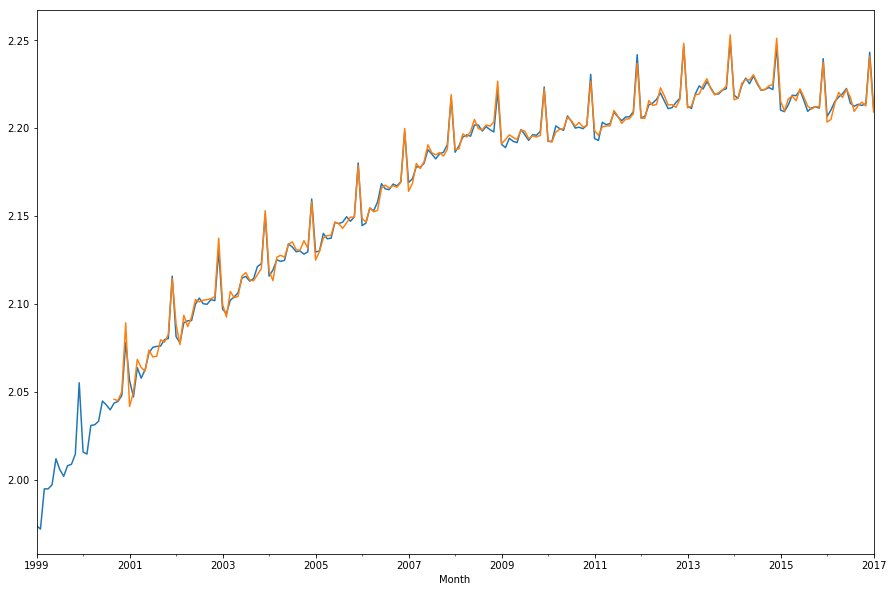

In [23]:
plt.figure(figsize=(15,10))
ts_wage_train['lambda=-0.40'].plot(label='log')
sarima_model.predict()[20:].plot(label='predicted')

In [24]:
param_p = [0,1,2,3]
param_d = [0,1,2]
param_q = [0,1,2,3]
param_P = [0,1,2,3]
param_D = [0,1,]
param_Q = [0,1,2,3]
param_s = [12,]

In [25]:
training_series = ts_wage_train['lambda=-0.40'][:'2015-02-01']

In [26]:
Quality = pd.DataFrame(columns=['p','d','q','P','D','Q','s','AIC','MACAPE'])
Quality = Quality[['p','d','q','P','D','Q','s','AIC','MACAPE']]
Quality.index.name = 'hash'

In [ ]:
import itertools
for i,(p,d,q,P,D,Q,s) in enumerate(itertools.product(param_p, param_d, param_q, param_P, param_D, param_Q, param_s)):
    try:
        print('TRIAL: %d'%i)
        
        row = {s:x for x,s in zip((p,d,q,P,D,Q,s), Quality.columns[:7])}
        h = my_hash((p,d,q,P,D,Q,s))
        if any(Quality.index == h):
            print('\t' + 'exsits in Quality, hash: %d' % h)
            continue
        row['AIC'] = 0
        row['MACAPE'] = 0
        sarima_model = sm.tsa.SARIMAX(training_series, order=(p,d,q),seasonal_order=(P,D,Q,s)).fit()
        prediction = sarima_model.predict()
        row['AIC'] = sarima_model.aic
        row['MACAPE'] = qualityMACAPE(training_series['2000-02':'2015-02-01'], prediction['2000-02':'2015-02-01'] )[0]
        
        Quality = Quality.append(pd.Series(row, name=h))
        print('trial:%d hash:%d' % (i,h))
        print('\t' + str(row))
    except Exception as ex:
        row['AIC'] = np.nan
        row['MACAPE'] = np.nan
        Quality = Quality.append(pd.Series(row, name=h))
        print('\t' + str(ex))

In [28]:
Quality.sort_values('AIC').head(10)

,p,d,q,P,D,Q,s,AIC,MACAPE
hash,,,,,,,,,
43999,0.0,1.0,1.0,3.0,0.0,2.0,12.0,-1661.359009,0.000987
52788,0.0,1.0,2.0,2.0,0.0,0.0,12.0,-1659.451632,0.001007
15179,0.0,1.0,1.0,1.0,0.0,2.0,12.0,-1659.142036,0.001006
28678,0.0,1.0,1.0,2.0,0.0,1.0,12.0,-1658.935378,0.001000
54610,0.0,1.0,2.0,2.0,0.0,2.0,12.0,-1658.271713,0.000994
94041,0.0,1.0,3.0,3.0,0.0,2.0,12.0,-1658.176820,0.000989
11402,1.0,1.0,0.0,2.0,0.0,0.0,12.0,-1657.779031,0.001018
29589,0.0,1.0,1.0,2.0,0.0,2.0,12.0,-1657.585879,0.000999
28714,3.0,1.0,0.0,2.0,0.0,0.0,12.0,-1657.512879,0.001008


In [29]:
Quality.sort_values('MACAPE').head(10)

,p,d,q,P,D,Q,s,AIC,MACAPE
hash,,,,,,,,,
91080,2.0,1.0,1.0,3.0,1.0,2.0,12.0,NaN,-0.072752
13634,1.0,2.0,1.0,1.0,0.0,2.0,12.0,-1653.486526,0.000965
90817,3.0,0.0,2.0,0.0,1.0,1.0,12.0,-1581.756895,0.000966
48484,1.0,0.0,1.0,0.0,1.0,1.0,12.0,-1584.462810,0.000973
42454,1.0,2.0,1.0,3.0,0.0,2.0,12.0,-1651.543560,0.000973
57140,2.0,0.0,1.0,0.0,1.0,1.0,12.0,-1576.214651,0.000973
12723,1.0,2.0,1.0,1.0,0.0,1.0,12.0,-1643.898699,0.000976
48747,0.0,1.0,0.0,3.0,1.0,2.0,12.0,-1581.037814,0.000977
72966,1.0,1.0,3.0,1.0,0.0,1.0,12.0,-1650.373027,0.000977


valid los MACAPE: 0.01560
test los MACAPE: 0.01535


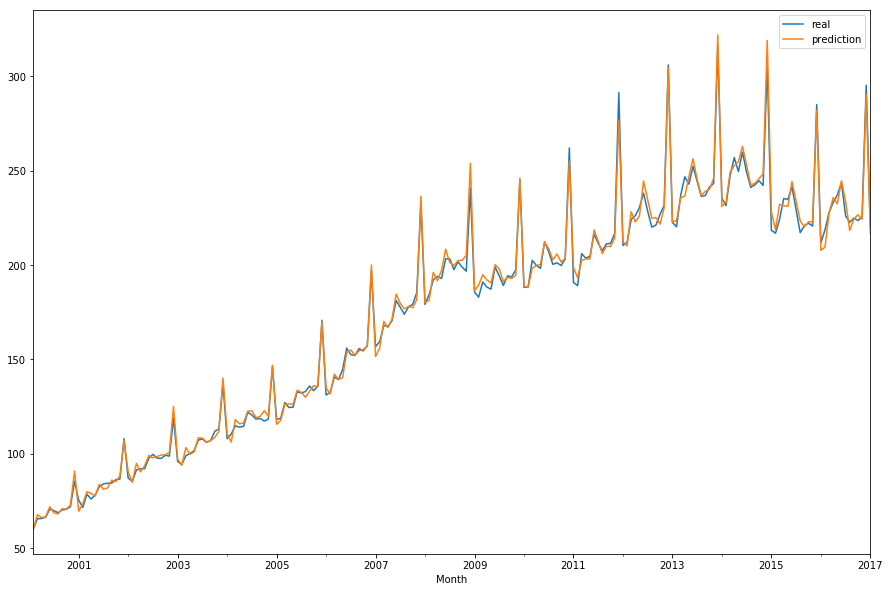

In [30]:
training_series = ts_wage_train['lambda=-0.40']
sarima_model = sm.tsa.SARIMAX(training_series, order=(0,1,1),seasonal_order=(3,0,2,12)).fit()
prediction = sarima_model.predict()
Lambda = -0.40
prediction = (prediction * Lambda + 1)**(1/Lambda)
plt.figure(figsize=(15,10))
ts_wage_train['real']['2000-02':].plot(label='real')
prediction['2000-02':].plot(label='prediction')
plt.legend()
print('valid los MACAPE: %0.5f' % qualityMACAPE(ts_wage_train['real']['2000-02':'2015-02-01'], 
                                                prediction['2000-02':'2015-02-01'] ))
print('test los MACAPE: %0.5f' % qualityMACAPE(ts_wage_train['real']['2015-02-01':], 
                                                prediction['2015-02-01':] ))

In [ ]:
Quality.to_csv('./SARIMA_params.csv')

In [27]:
Quality = pd.read_csv('./SARIMA_params.csv', index_col='hash')
Quality.head()

,p,d,q,P,D,Q,s,AIC,MACAPE
hash,,,,,,,,,
84146,0.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN
85057,0.0,0.0,0.0,0.0,0.0,1.0,12.0,NaN,NaN
85968,0.0,0.0,0.0,0.0,0.0,2.0,12.0,NaN,NaN
86879,0.0,0.0,0.0,0.0,0.0,3.0,12.0,NaN,NaN
13896,0.0,0.0,0.0,0.0,1.0,0.0,12.0,NaN,NaN


**II. Find the best parameters of ARIMA automaticaly** 
* 0) Use data before 01.02.2015 
* 1) Plot the graph of time series, preprocess data (delete tail, make calendar transformation if needed)
* 2) Run grid search for ARIMA parameters (at least for 3 distinct values for $p,q,d, P, Q, D$). 
How many time does it take?
* 4) Find the best set of parameters according to AIC.
* 5) Build the forecast of the best model and it's forecasting interval for period from 01.02.2015 to 01.01.2017.
* 6) Calculate locc MACAPE of your forecast.

see above

<h1 align="center">3. ARIMA Momdel for wage dataset (55%) </h1>
You need to analyseTS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">energy_consumption.csv</span> in accordance with forecasting scheme (see lecture slide Scheme of TS forecasting with ARIMA) and then build forecast.

**I. Select ARIMA parameters yourself **
Follow to the steps from 2.I. 

In [31]:
ts_energy_dn = ts_energy.dropna(axis=1, how='all').dropna() # without nan
print(ts_energy_dn.shape)
ts_energy_dn.head()

(1959, 7)


,Hub,ZSP,EnergyConsump,Temp1,Temp2,Saturday,Sunday
Date,,,,,,,
2010-01-01,Center,FZSZOE27,147487.171,-17.8,-16.9,0.0,1.0
2010-01-02,Center,FZSZOE27,155433.800,-17.8,-20.3,1.0,0.0
2010-01-03,Center,FZSZOE27,164140.232,-16.4,-24.0,0.0,1.0
2010-01-04,Center,FZSZOE27,171382.848,-10.2,-15.7,0.0,1.0
2010-01-05,Center,FZSZOE27,170188.290,-7.2,-8.8,0.0,1.0


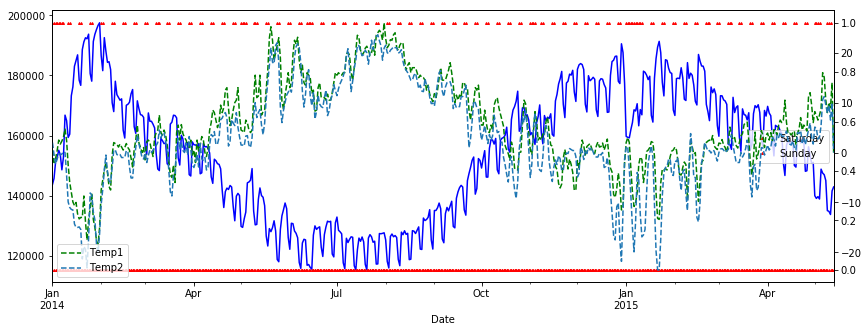

In [32]:
fig, ax = plt.subplots(figsize=(14,5))
ax2, ax3 = ax.twinx(), ax.twinx()
for_plot = ts_energy_dn.loc['2014':'2015']
for_plot['EnergyConsump'].plot(ax = ax,  style='b-')
for_plot[['Saturday', 'Sunday']].plot(ax = ax2, style='r', marker = '^', markersize = 2.0, linewidth=0.0)
for_plot['Temp1'].plot(ax = ax3,  style='g--')
for_plot['Temp2'].plot(ax = ax3,  style='--')
plt.legend(loc='lower left')

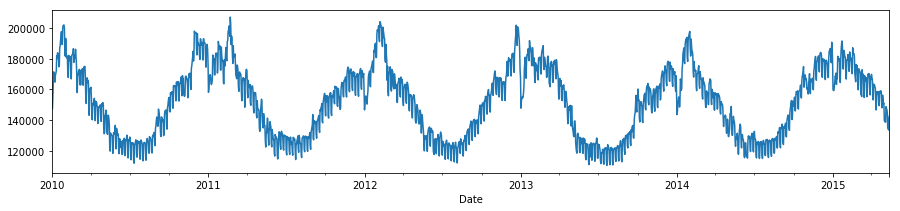

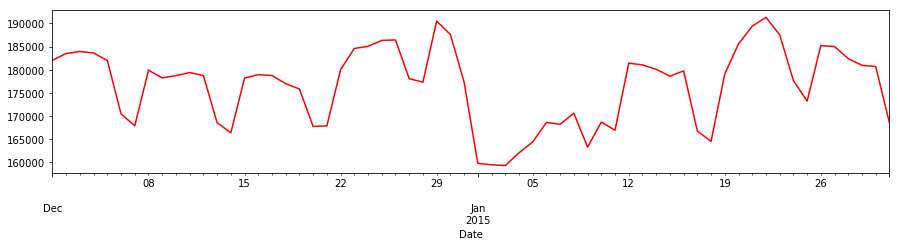

In [33]:
ts_energy_dn['EnergyConsump'].plot(figsize=(15,3))
plt.show()
ts_energy_dn['EnergyConsump']['2014-12':'2015-01'].plot(figsize=(15,3), style='r')

In [34]:
ts_energy_dn['diff seasonal'] = ts_energy_dn['EnergyConsump'] - ts_energy_dn['EnergyConsump'].shift(7)
ts_energy_dn['diff first'] = ts_energy_dn['EnergyConsump'] - ts_energy_dn['EnergyConsump'].shift(1)
ts_energy_dn['diff first seasonal'] = ts_energy_dn['diff seasonal'] - ts_energy_dn['diff seasonal'].shift(1)

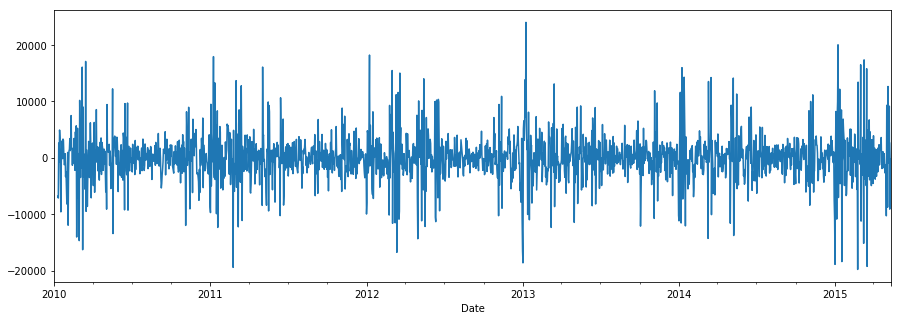

In [35]:
ts_energy_dn['diff first seasonal'][:].plot(figsize=(15,5))

The null-hypothesis for an ADF test is that the data are non-stationary. So large p-values are indicative of non-stationarity, and small p-values suggest stationarity. 

In [36]:
print('ADF test p-value: %e' % sm.tsa.stattools.adfuller(ts_energy_dn['diff seasonal'].dropna())[1])

ADF test p-value: 3.430530e-11


null-hypothesis is that the data are stationary. In this case, small p-values (e.g., less than 0.05) suggest that differencing is required.

In [37]:
print('KPSS test p-value: %f' % sm.tsa.stattools.kpss(ts_energy_dn['diff first'].dropna())[0])

KPSS test p-value: 0.032059


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


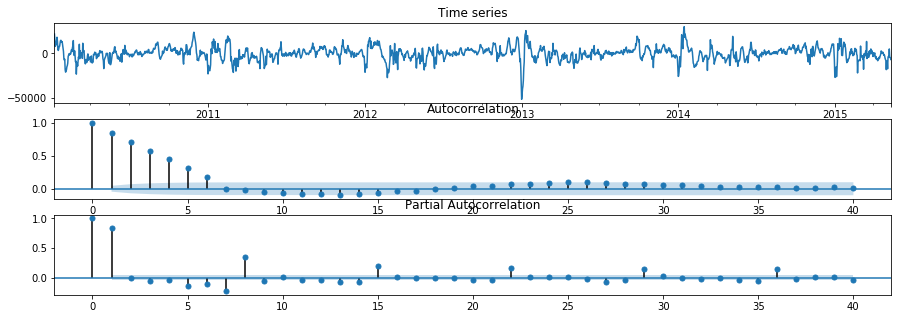

In [38]:
plot_this = ts_energy_dn['diff seasonal'].dropna()
fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(311)
plot_this.plot(ax=ax0, title='Time series')
ax1 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_acf(plot_this, lags=40, ax=ax1)
ax2 = fig.add_subplot(313)
fig = sm.graphics.tsa.plot_pacf(plot_this, lags=40, ax=ax2)

### SARIMA

order:(p,d,q), seasonal_order:(P,D,Q,s)

In [39]:
sarima_model_withoutexog = sm.tsa.SARIMAX(ts_energy_dn['EnergyConsump'][:'2013-10-01'], order=(1,0,1),seasonal_order=(4,1,0,7)).fit()
print(sarima_model_withoutexog.aic, sarima_model_withoutexog.bic, sarima_model_withoutexog.hqic)

(26756.368037425797, 26792.925999557552, 26770.048981542252)


In [40]:
sarima_model = sm.tsa.SARIMAX(ts_energy_dn['EnergyConsump'][:'2013-10-01'], order=(1,0,1),seasonal_order=(4,1,0,7),
                              exog=ts_energy_dn[['Temp1','Temp2', 'Saturday','Sunday']][:'2013-10-01']).fit()
# exog=ts_energy_dn[['Temp1','Temp2', 'Saturday','Sunday']][:'2013-10-01']
print(sarima_model.aic, sarima_model.bic, sarima_model.hqic)

prediction = sarima_model.predict()

(26301.083973365028, 26358.532199572073, 26322.582599833746)


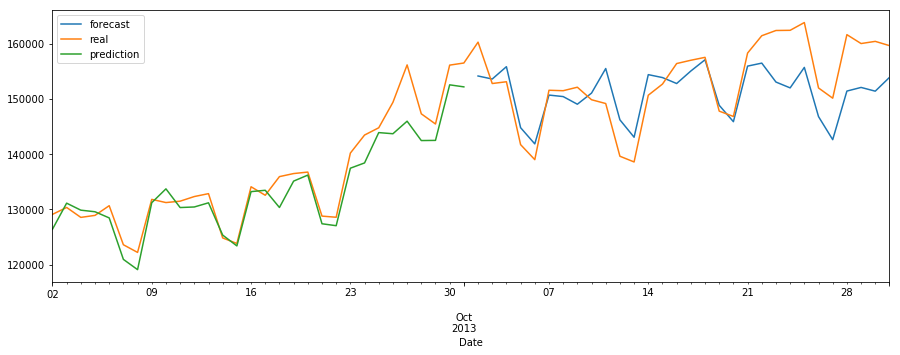

In [41]:
fig = plt.figure(figsize=(15,5))
sarima_model.forecast(steps=30, exog=ts_energy_dn[['Temp1','Temp2', 'Saturday','Sunday']][pd.Timestamp('2013-10-02'):
                                    pd.Timestamp('2013-10-01') + pd.Timedelta(30,'D')]).plot(label='forecast')
ts_energy_dn['EnergyConsump'][pd.Timestamp('2013-09-02'):
                                    pd.Timestamp('2013-10-01') + pd.Timedelta(30,'D')].plot(label='real')
prediction[pd.Timestamp('2013-09-02'):
                                    pd.Timestamp('2013-10-01')].plot(label='prediction')
plt.legend()

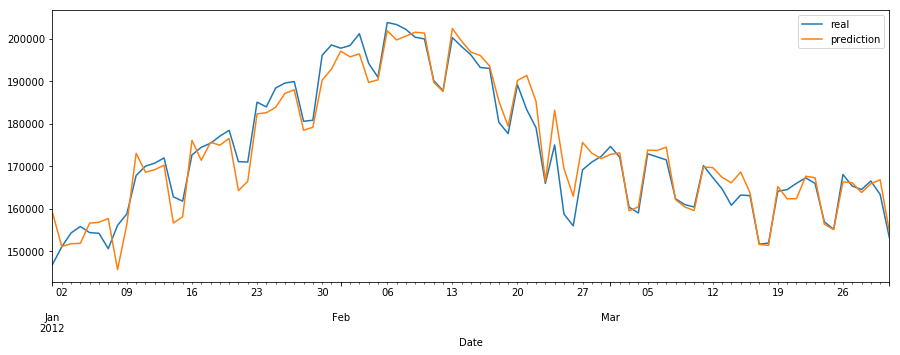

In [42]:
plt.figure(figsize=(15,5))
ts_energy_dn['EnergyConsump']['2012-01':'2012-03'].plot(label='real')
prediction['2012-01':'2012-03'].plot(label='prediction')
plt.legend()

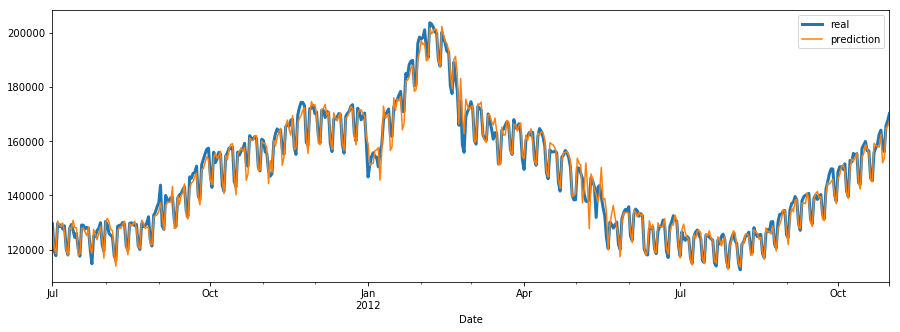

In [43]:
plt.figure(figsize=(15,5))
ts_energy_dn['EnergyConsump']['2011-07':'2012-10'].plot(label='real', linewidth=3)
prediction['2011-07':'2012-10'].plot(label='prediction')
plt.legend()

In [44]:
qualityMACAPE(ts_energy_dn['EnergyConsump']['2010-07':'2013-10-01'], prediction['2010-07':'2013-10-01'])

0.014129674220291599

**II. Find the best parameters of ARIMA automaticaly**

Sorry, my machine is able to do that job, but it would take days :) so I've chosen parameters from ACF PACF graphs.

** III. Adding of exogenious variables**

* 1) Try to add in models from 3.I. and 3.II exogenious variables (at least one of Temp1, Temp2, Saturday and Sunday).
* 2) Does it make accuracy of foreacast for period from 01.02.2015 to 01.01.2017 better?

In [45]:
print('MACAPE, model without exog: %f' % qualityMACAPE(ts_energy_dn['EnergyConsump'][:'2013-10-01'], sarima_model_withoutexog.predict()[:'2013-10-01']))

MACAPE, model without exog: 0.020233


In [46]:
print('MACAPE, model with exog: %f' % qualityMACAPE(ts_energy_dn['EnergyConsump'][:'2013-10-01'], sarima_model.predict()[:'2013-10-01']))

MACAPE, model with exog: 0.018772
